In [1]:
import os 
import matplotlib.pyplot as plt

from carla_loader import CarlaFullDataset
import torchvision.transforms as transforms

from IPython.display import Video

import ffmpeg

In [2]:
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomGrayscale(p=0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

mask_transform = transforms.Compose(
    [
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
    ]
)

traj_transform = transforms.Compose(
    [
        transforms.Resize((56, 56)),
        transforms.ToTensor(),
    ]
)

dataset = CarlaFullDataset(
    "/ssd_scratch/cvit/kanishk/carla_data",
    "/ssd_scratch/cvit/kanishk/glove",
    "train",
    mode="video",
    img_transform=transform,
    mask_transform=mask_transform,
    traj_transform=traj_transform
)

Number of episodes before removal:  441
Number of episodes after removal:  399


In [3]:
batch = dataset.__getitem__(0)

gt_mask = batch['anchor_mask']

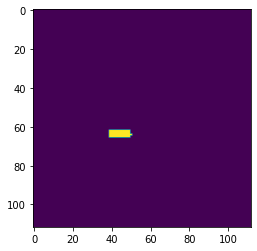

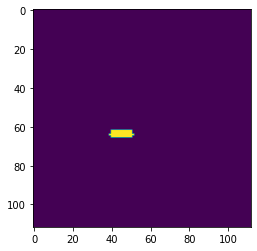

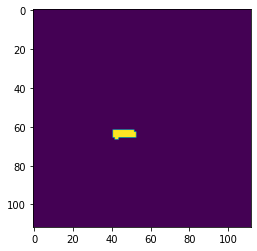

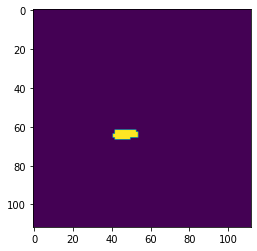

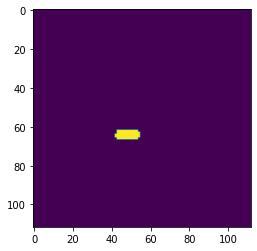

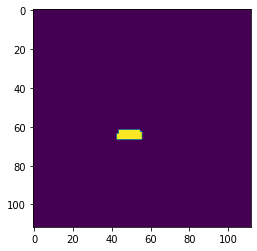

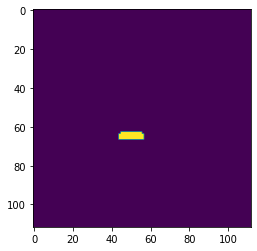

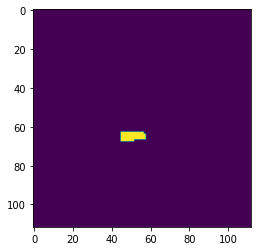

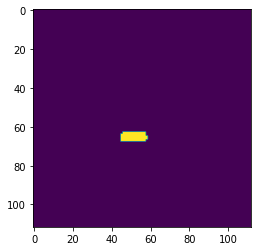

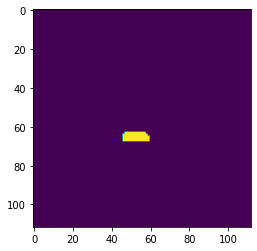

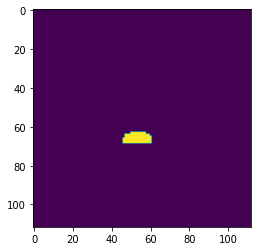

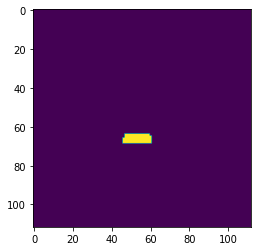

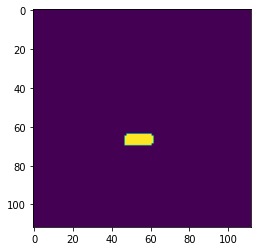

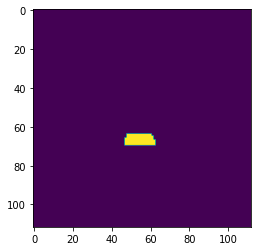

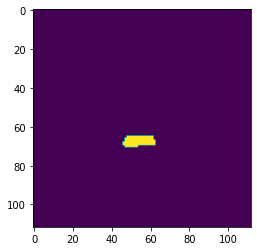

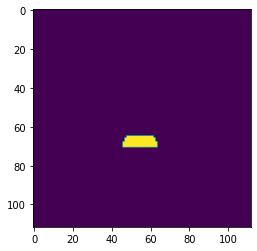

In [5]:
for i in range(gt_mask.shape[0]):
    mask_gt = gt_mask[i, 0]
    
    plt.imshow(mask_gt)
    plt.show()

In [11]:
# try:
#     os.remove(f"movie_{episode}.mp4")
# except:
#     pass

# ffmpeg.input(
#     f"/ssd_scratch/cvit/kanishk/carla_data/train/{episode}/images/*.png",
#     pattern_type="glob",
#     framerate=25,
# ).output(f"movie_{episode}.mp4").run()


# Video(f"movie_{episode}.mp4")

# # os.remove("movie.mp4")

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --

In [9]:
os.remove(f"movie_{episode}.mp4")